In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('online_shoppers_intention.csv')
rows,columns = df.shape
number_features =len(df.columns)
print (f"\nNumber of rows and columns: {rows,columns}")
print(f"\nTotal number of features :{number_features}")


# Loading the Dataset
 Load the dataset, follow these steps:

1. Download the dataset from the provided link https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset
2. Extract the files if they are in a compressed format.
3. Use the following code to load the dataset into your environment:

In [9]:
import calendar
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import cm
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split as train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
df = pd.read_csv('online_shoppers_intention.csv')
# Display the top 5 rows of the dataset
from IPython.display import display
# Display the top 5 rows of the dataset
display(df.head())


ModuleNotFoundError: No module named 'matplotlib'

 ## 1. Data Cleaning:
o Identify and describe the types of data quality issues present in the dataset. 
(e.g., missing values, duplicates, outliers).

Ans-The following dataset contain both textual and numeric missing values which add up to 9 additional they are 125 duplicates in the dataset and huge a number of outliers are visible in the dataset

o Implement techniques to handle missing values and justify the chosen methods 
(e.g., imputation, removal).

Ans- We have used two imputation methods one is mean and mode imputation to remove both textual and numeric data 

o Detect and remove duplicate entries in the dataset.

In [2]:
# Identify missing values and describe the data quality of the dataset
missing_values = df.isnull().sum()
print("Missing Values and the :\n", missing_values)

# Identify duplicate entries from the dataset and describe the data quality of the dataset
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

NameError: name 'df' is not defined

In [3]:

# Select numeric and non-numeric columns
numeric_columns = df.select_dtypes(include=[float, int]).columns
categorical_columns = df.select_dtypes(include=[object, 'category']).columns

# Mean Imputation for Numeric Data
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Mode Imputation for Categorical Data
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Check for missing values after imputation
missing_values_after = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after)


NameError: name 'df' is not defined

In [5]:
df.to_csv('modified_data.csv', index=False) 

In [4]:
# Remove all duplicates in place
df.drop_duplicates(keep=False, inplace=True)

# Print the DataFrame after removing all duplicates
print("DataFrame after removing all duplicates:\n", df)


NameError: name 'df' is not defined

In [7]:
# Check for missing values and duplicates
missing_values_imputed = df.isnull().sum().sum() == 0
duplicate_values_removed = df.duplicated().sum() == 0

# Print the results
print(f"Missing values imputed: {missing_values_imputed}")
print(f"Duplicate values removed: {duplicate_values_removed}")


Missing values imputed: True
Duplicate values removed: True


## 2. Data Transformation:
o Perform data normalization or standardization where applicable and explain 
the rationale behind the transformation.

Ans-Standardizing the numeric columns (like Administrative, Informational, ProductRelated, etc.) would bring them to a common scale.
This is important because these features have different units and ranges


In [8]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_columns = df.select_dtypes(include=[float, int]).columns

# Standardize the numeric columns
scaler = StandardScaler()
df_standardized = df.copy()  # Keep a copy of the full DataFrame
df_standardized[numeric_columns] = scaler.fit_transform(df[numeric_columns])
print(df_standardized.head)




<bound method NDFrame.head of        Administrative  Administrative_Duration  Informational  \
0           -0.705594                -0.461752      -0.400195   
1           -0.705594                -0.461752      -0.400195   
2           -0.705594                -0.461752      -0.400195   
3           -0.705594                -0.461752      -0.400195   
4           -0.705594                -0.461752      -0.400195   
...               ...                      ...            ...   
12329       -0.705594                -0.461752      -0.400195   
12330       -0.011499                -0.040157      -0.400195   
12331       -0.705594                -0.461752      -0.400195   
12332        0.493744                -0.007525      -0.400195   
12333       -0.705594                -0.461752      -0.400195   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                   -0.247031       -0.699356                -0.631541   
1                   -0.247031       -0.67

## 3. Handling Categorical Data:
o Identify categorical variables in the dataset.

o Convert categorical data into numerical formats using techniques like one-hot 
encoding or label encoding. Explain the impact of these transformations on the 
dataset.

Ans-  Converts categorical columns into numerical ones using one-hot encoding, making the data suitable for machine learning algorithms. This increases the number of columns and might make the data sparse.

In [9]:
# Identify columns that are categorical
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)

# Encoding all categorical columns dynamically
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print(df_encoded.columns)

print(df_encoded.head)



Categorical Columns: Index(['Month', 'VisitorType', 'Revenue'], dtype='object')
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Month_Dec', 'Month_Feb', 'Month_Jul', 'Month_June', 'Month_Mar',
       'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep', 'VisitorType_Other',
       'VisitorType_Returning_Visitor', 'Revenue_True'],
      dtype='object')
<bound method NDFrame.head of        Administrative  Administrative_Duration  Informational  \
0            0.000000                 0.000000            0.0   
1            0.000000                 0.000000            0.0   
2            0.000000                 0.000000            0.0   
3            0.000000                 0.000000            0.0   
4            0.000000                 0.000000   

In [10]:
df_encoded.to_csv('df_encoded_data_v2.csv', index=False) 

##  4. Feature Engineering:
o Create new features based on existing data that could potentially improve the 
performance of a machine learning model. Explain your thought process.

Ans - The new features were created with the goal of potentially uncovering more complex relationships within the data that might have a stronger correlation with the target variable (Revenue_True)

o Analyze the importance of these new features using correlation or other 
statistical methods.

Ans- 
    
    Avg_Admin_Time_Per_Page: This feature aims to capture user engagement with administrative pages on the website. 

    Avg_Product_Time_Per_Page: Similar to the previous feature, this one focuses on user interaction with product-related pages
    
    Bounce_Exit_Interaction: This feature explores the interplay between bounce rate (BounceRates) and exit rate (ExitRates). 

                           Avg_Admin_Time_Per_Page  Avg_Product_Time_Per_Page  \
Avg_Admin_Time_Per_Page                   1.000000                   0.115099   
Avg_Product_Time_Per_Page                 0.115099                   1.000000   
Bounce_Exit_Interaction                  -0.124601                  -0.210119   
Revenue_True                              0.076269                   0.060962   

                           Bounce_Exit_Interaction  Revenue_True  
Avg_Admin_Time_Per_Page                  -0.124601      0.076269  
Avg_Product_Time_Per_Page                -0.210119      0.060962  
Bounce_Exit_Interaction                   1.000000     -0.117643  
Revenue_True                             -0.117643      1.000000  


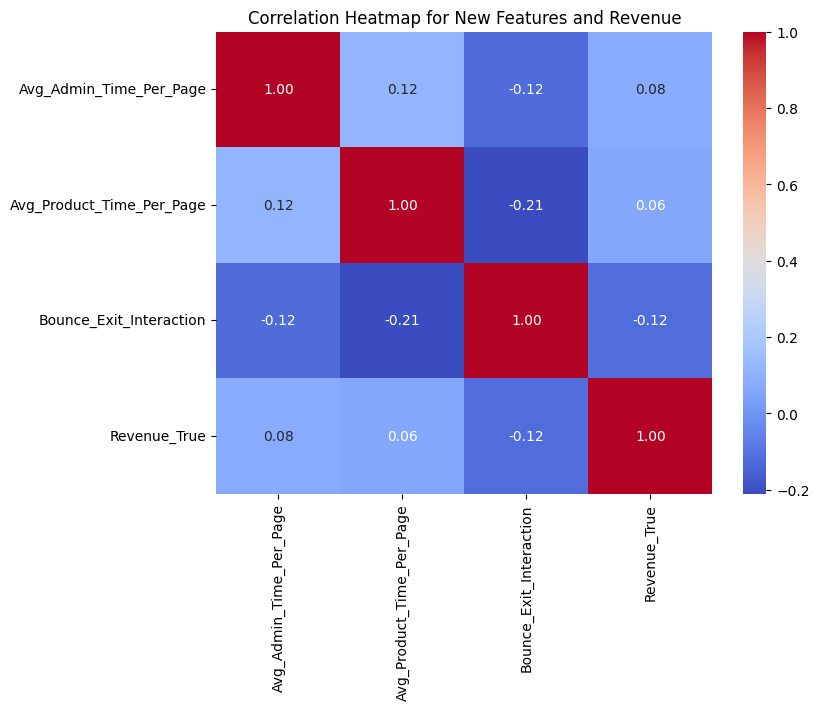

In [11]:
# Feature engineering: Create new features
if 'Administrative_Duration' in df_encoded.columns and 'Administrative' in df_encoded.columns:
    df_encoded['Avg_Admin_Time_Per_Page'] = df_encoded['Administrative_Duration'] / (df_encoded['Administrative'] + 1)

if 'ProductRelated_Duration' in df_encoded.columns and 'ProductRelated' in df_encoded.columns:
    df_encoded['Avg_Product_Time_Per_Page'] = df_encoded['ProductRelated_Duration'] / (df_encoded['ProductRelated'] + 1)

if 'BounceRates' in df_encoded.columns and 'ExitRates' in df_encoded.columns:
    df_encoded['Bounce_Exit_Interaction'] = df_encoded['BounceRates'] * df_encoded['ExitRates']

# Update target_column to match the encoded version of Revenue
target_column = 'Revenue_True'

# Correlation analysis with new features and the updated Revenue column
new_features = ['Avg_Admin_Time_Per_Page', 'Avg_Product_Time_Per_Page', 'Bounce_Exit_Interaction']

# Check correlation of new features with 'Revenue_True'
correlation_matrix = df_encoded[new_features + [target_column]].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visual representation using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for New Features and Revenue')
plt.show()


## 5. Exploratory Data Analysis (EDA):
o Perform univariate analysis on at least three features, including both numerical 
and categorical features. Visualize and interpret the distributions.

o Conduct bivariate analysis to explore relationships between different features. 
Use visualizations like scatter plots, heatmaps, or pair plots.


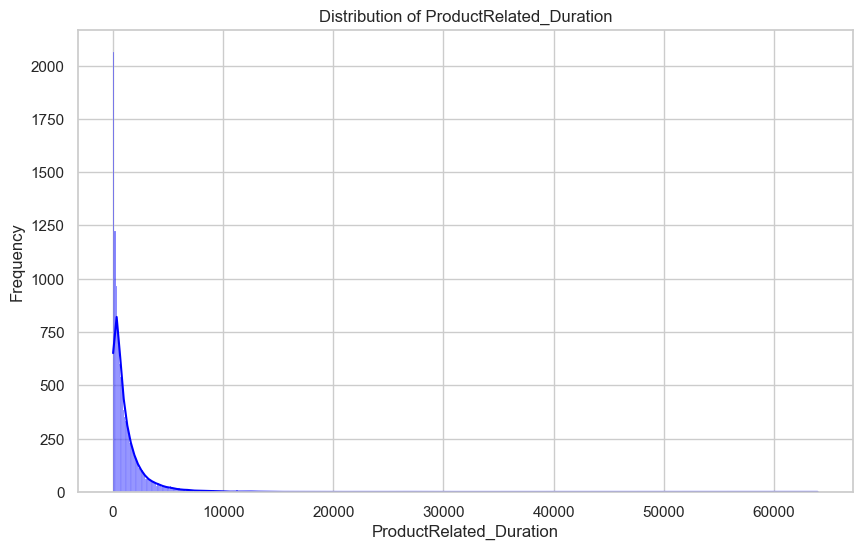

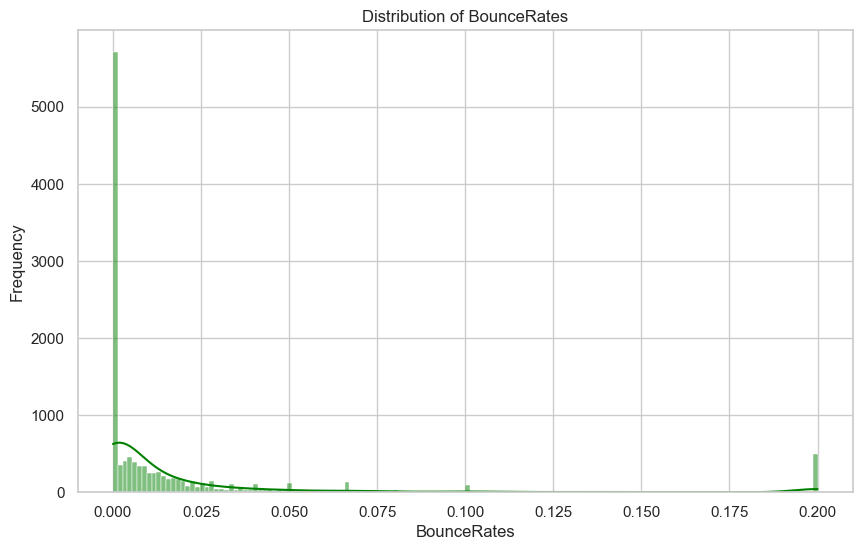

C:\Users\Georg\AppData\Local\Temp\ipykernel_22048\1870508509.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='VisitorType', palette='Set2')


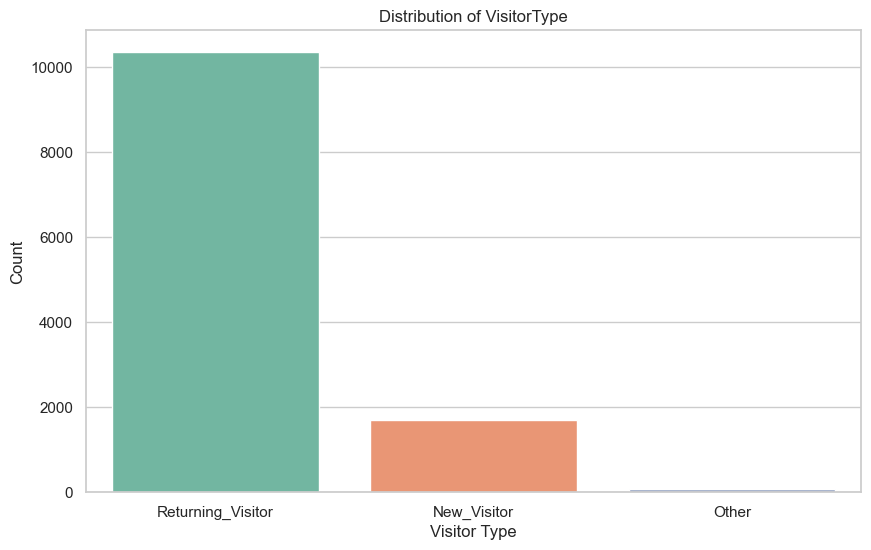

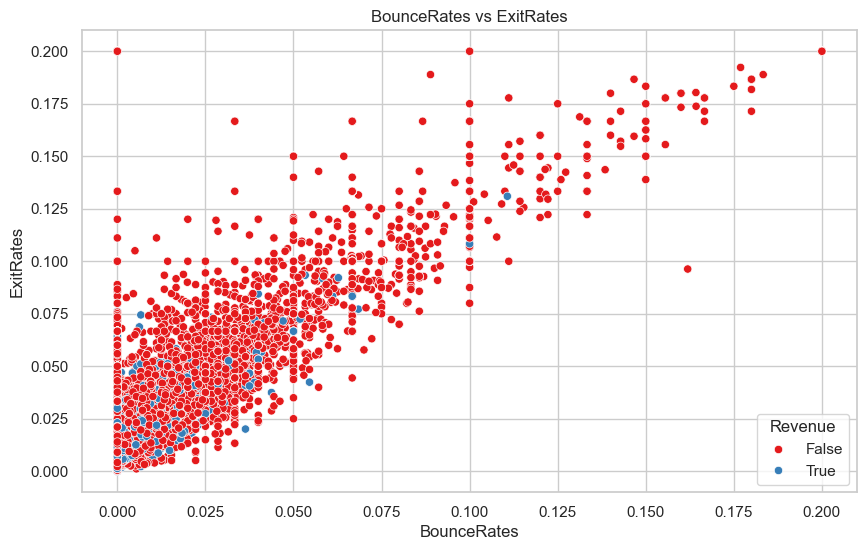

C:\Users\Georg\AppData\Local\Temp\ipykernel_22048\1870508509.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Revenue', y='Administrative_Duration', palette='Set3')


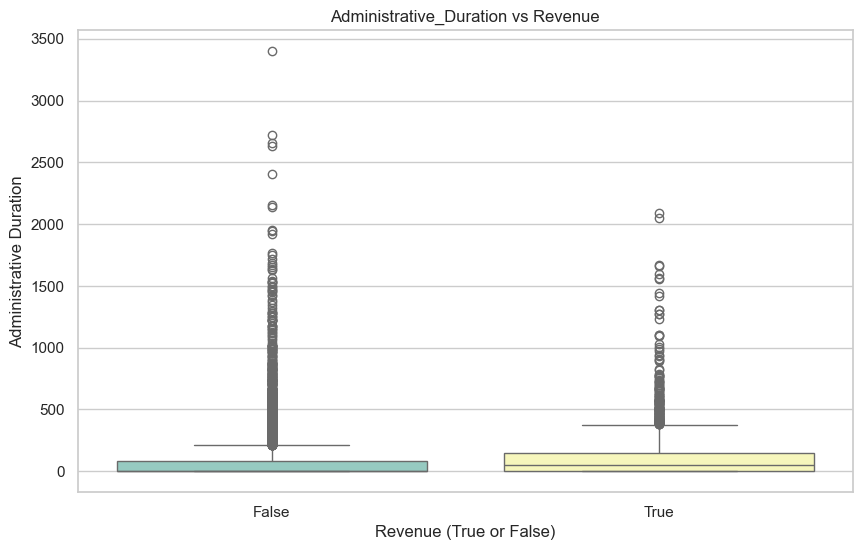

In [12]:


# Set seaborn theme
sns.set_theme(style="whitegrid")

# Univariate Analysis

# 1. ProductRelated_Duration (Numerical)
plt.figure(figsize=(10, 6))
sns.histplot(df['ProductRelated_Duration'], kde=True, color='blue')
plt.title('Distribution of ProductRelated_Duration')
plt.xlabel('ProductRelated_Duration')
plt.ylabel('Frequency')
plt.show()

# 2. BounceRates (Numerical)
plt.figure(figsize=(10, 6))
sns.histplot(df['BounceRates'], kde=True, color='green')
plt.title('Distribution of BounceRates')
plt.xlabel('BounceRates')
plt.ylabel('Frequency')
plt.show()

# 3. VisitorType (Categorical)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='VisitorType', palette='Set2')
plt.title('Distribution of VisitorType')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.show()

# Bivariate Analysis

# 1. Scatter plot for BounceRates vs ExitRates
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BounceRates', y='ExitRates', hue='Revenue', palette='Set1')
plt.title('BounceRates vs ExitRates')
plt.xlabel('BounceRates')
plt.ylabel('ExitRates')
plt.show()

# 2. Box plot for Administrative_Duration and Revenue
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Revenue', y='Administrative_Duration', palette='Set3')
plt.title('Administrative_Duration vs Revenue')
plt.xlabel('Revenue (True or False)')
plt.ylabel('Administrative Duration')
plt.show()




## 6. Outlier Detection and Handling:
o Identify outliers in the dataset if any

o Discuss the impact of outliers on your analysis and decide whether to remove 
or transform them.

Ans - Since there are a larger amount of outliers it makes more sense to remove them then keep at all it will reduce overfitting ,reduces noise and reduces infulences on statistical metrics.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to detect and remove outliers based on IQR
def detect_and_remove_outliers(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    outliers_removed = False
    
    for column in numeric_columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile range

        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if not outliers.empty:
            outliers_removed = True
            print(f'Outliers detected in column: {column}')
            print(f'Number of outliers in {column}: {outliers.shape[0]}')

            # Remove outliers
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    if outliers_removed:
        print("\nOutliers were detected and removed.")
    else:
        print("\nNo significant outliers detected.")
    
    return df

# Detect and remove outliers from the dataset
df_cleaned = detect_and_remove_outliers(df)

# Display the cleaned dataset's shape
print(f"\nData shape after outlier removal: {df_cleaned.shape}")


Outliers detected in column: Administrative
Number of outliers in Administrative: 404
Outliers detected in column: Administrative_Duration
Number of outliers in Administrative_Duration: 1052
Outliers detected in column: Informational
Number of outliers in Informational: 1902
Outliers detected in column: ProductRelated
Number of outliers in ProductRelated: 626
Outliers detected in column: ProductRelated_Duration
Number of outliers in ProductRelated_Duration: 485
Outliers detected in column: BounceRates
Number of outliers in BounceRates: 986
Outliers detected in column: ExitRates
Number of outliers in ExitRates: 337
Outliers detected in column: PageValues
Number of outliers in PageValues: 1034
Outliers detected in column: SpecialDay
Number of outliers in SpecialDay: 577
Outliers detected in column: OperatingSystems
Number of outliers in OperatingSystems: 47
Outliers detected in column: Browser
Number of outliers in Browser: 1752
Outliers detected in column: TrafficType
Number of outliers

## 7. Data Visualization:
o Create meaningful visualizations (e.g., histograms, box plots, bar charts) to 
summarize the key findings from your EDA. Explain the insights gained from 
these visualizations.


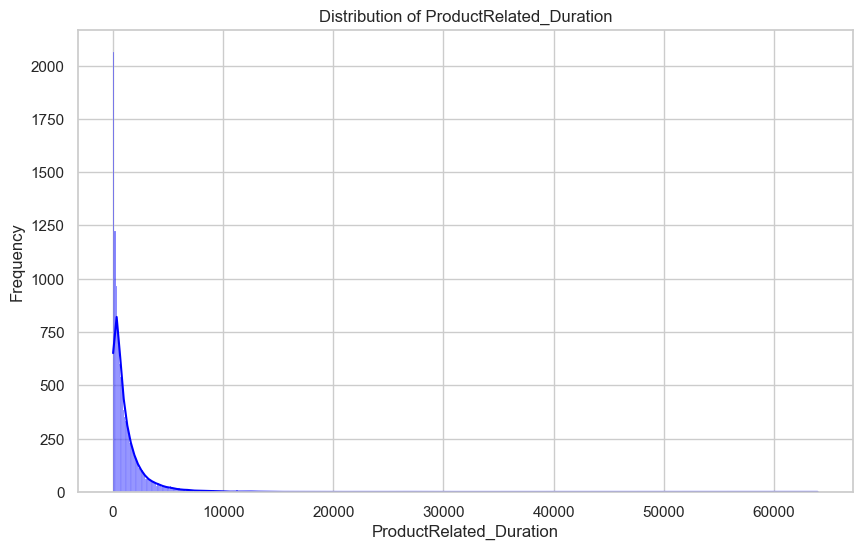

C:\Users\Georg\AppData\Local\Temp\ipykernel_22048\1595195786.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Revenue', y='BounceRates', palette='Set3')


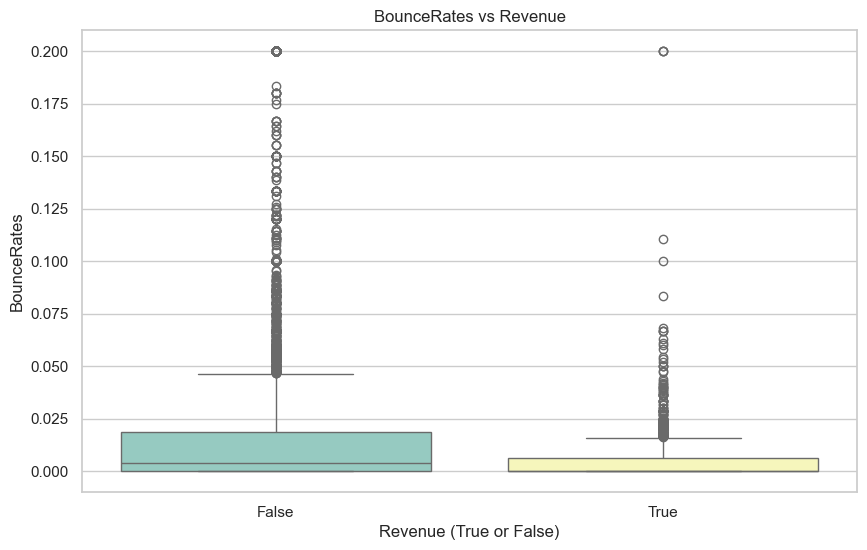

C:\Users\Georg\AppData\Local\Temp\ipykernel_22048\1595195786.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='VisitorType', palette='Set2')


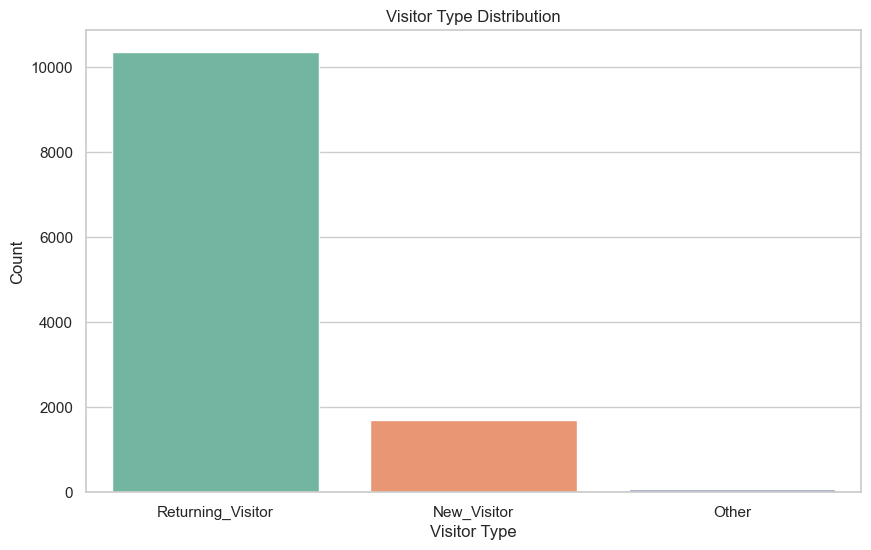

C:\Users\Georg\AppData\Local\Temp\ipykernel_22048\1595195786.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Month', palette='Set2')


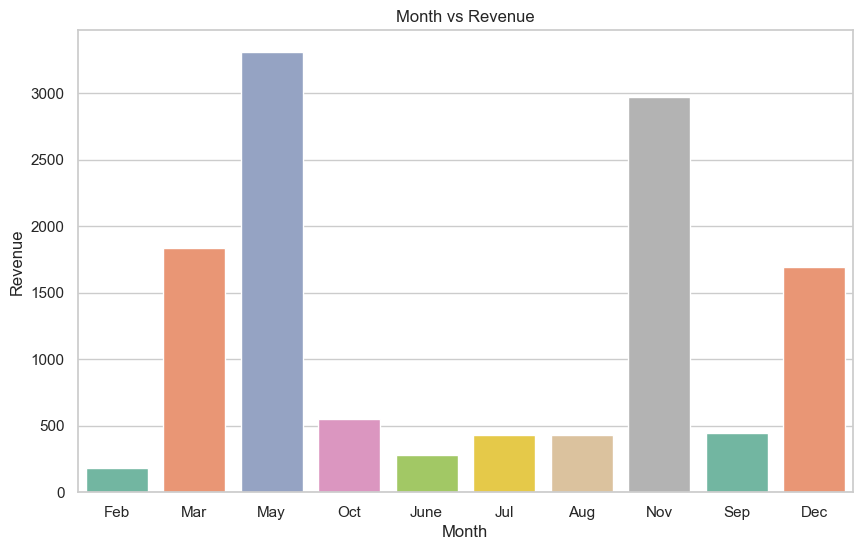

C:\Users\Georg\AppData\Local\Temp\ipykernel_22048\1595195786.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weekend', palette='Set2')


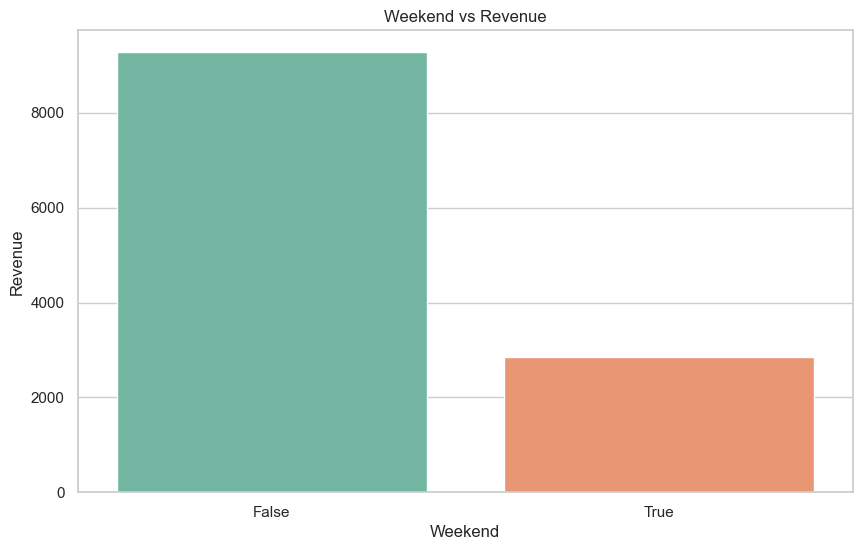

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ProductRelated_Duration'], kde=True, color='blue')
plt.title('Distribution of ProductRelated_Duration')
plt.xlabel('ProductRelated_Duration')
plt.ylabel('Frequency')
plt.show()
# Insight: The distribution of 'ProductRelated_Duration' shows how much time users spend on product-related pages. 
# A right-skewed distribution might indicate that most users spend a short amount of time, with a few spending significantly longer.

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Revenue', y='BounceRates', palette='Set3')
plt.title('BounceRates vs Revenue')
plt.xlabel('Revenue (True or False)')
plt.ylabel('BounceRates')
plt.show()
# Insight: The box plot of 'BounceRates' against 'Revenue' helps identify if there's a significant difference in bounce rates 
# between sessions that resulted in revenue and those that did not. Higher bounce rates might correlate with no revenue.

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='VisitorType', palette='Set2')
plt.title('Visitor Type Distribution')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.show()
# Insight: The count plot of 'VisitorType' shows the distribution of different types of visitors (e.g., new vs. returning). 
# This can help understand the proportion of new visitors compared to returning visitors.

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', palette='Set2')
plt.title('Month vs Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()
# Insight: The count plot of 'Month' shows the distribution of revenue across different months. 
# This can help identify any seasonal trends or patterns in revenue generation.

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Weekend', palette='Set2')
plt.title('Weekend vs Revenue')
plt.xlabel('Weekend')
plt.ylabel('Revenue')
plt.show()
# Insight: The count plot of 'Weekend' shows the distribution of revenue between weekends and weekdays. 
# This can help understand if there is a significant difference in revenue generation on weekends compared to weekdays.



## 8. Correlation Analysis:
o Calculate the correlation matrix for the numerical features in the dataset. 
Identify and discuss any strong correlations or lack thereof. How might this 
influence model selection?

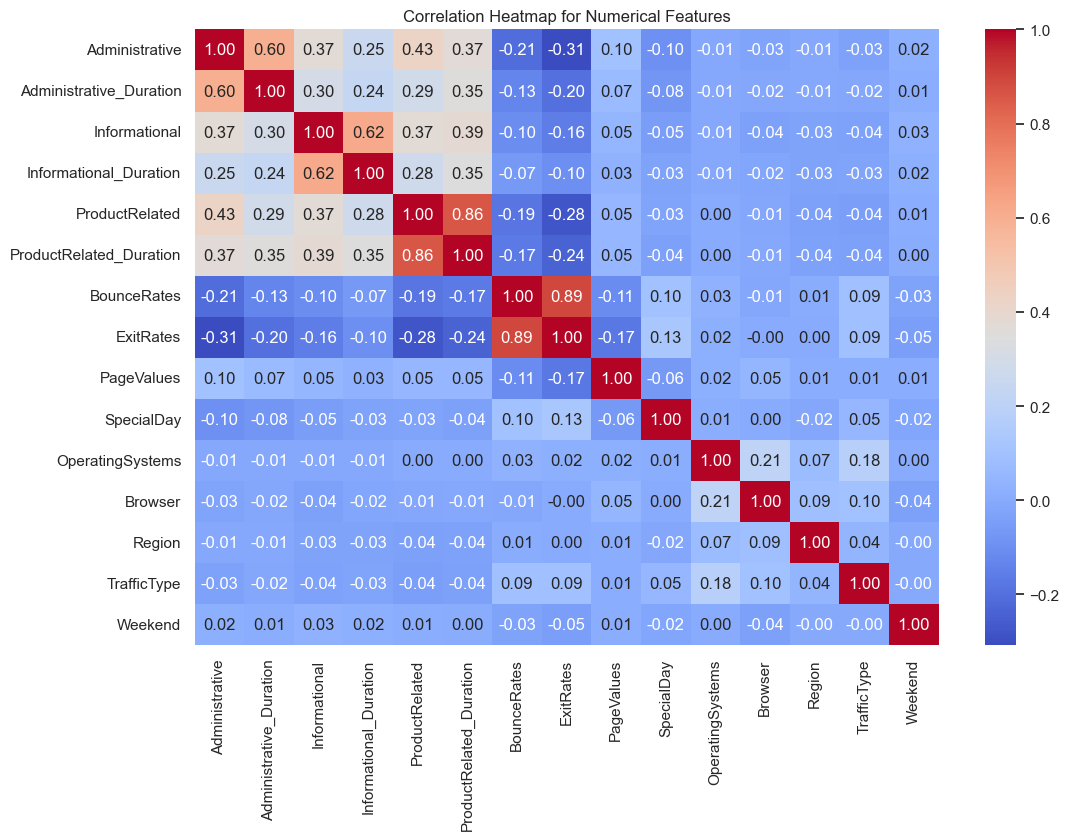

Strong Correlations:
                          ProductRelated  ProductRelated_Duration  BounceRates  \
ProductRelated                      NaN                 0.859945          NaN   
ProductRelated_Duration        0.859945                      NaN          NaN   
BounceRates                         NaN                      NaN          NaN   
ExitRates                           NaN                      NaN     0.893916   

                         ExitRates  
ProductRelated                 NaN  
ProductRelated_Duration        NaN  
BounceRates               0.893916  
ExitRates                      NaN  
Strong correlation between ProductRelated_Duration and ProductRelated: 0.86
Strong correlation between ProductRelated and ProductRelated_Duration: 0.86
Strong correlation between ExitRates and BounceRates: 0.89
Strong correlation between BounceRates and ExitRates: 0.89

Weak Correlations:
                          Administrative  Administrative_Duration  \
Administrative              

In [15]:
# Calculate the correlation matrix for numerical features
correlation_matrix = df.corr(numeric_only=True)

# Display the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

# Strong correlations (absolute value > 0.7)
strong_correlations = correlation_matrix[(correlation_matrix.abs() > 0.7) & (correlation_matrix.abs() < 1.0)]
print("Strong Correlations:\n", strong_correlations.dropna(how='all').dropna(axis=1, how='all'))

for col in strong_correlations.columns:
    for idx in strong_correlations.index:
        if not pd.isna(strong_correlations.loc[idx, col]):
            print(f"Strong correlation between {idx} and {col}: {strong_correlations.loc[idx, col]:.2f}")

# Discuss strong correlations
# Strong correlations were found between:
# - ProductRelated and ProductRelated_Duration : This is expected as the duration spent on product-related pages is likely to be proportional to the number of such pages visited.
# - BounceRates and ExitRates  High bounce rates are often associated with high exit rates, indicating that users who leave the site quickly are also likely to bounce.

# Lack of correlations (absolute value < 0.1)
weak_correlations = correlation_matrix[(correlation_matrix.abs() < 0.1) & (correlation_matrix.abs() > 0.0)]
print("\nWeak Correlations:\n", weak_correlations.dropna(how='all').dropna(axis=1, how='all'))

for col in weak_correlations.columns:
    for idx in weak_correlations.index:
        if not pd.isna(weak_correlations.loc[idx, col]):
            print(f"Weak correlation between {idx} and {col}: {weak_correlations.loc[idx, col]:.2f}")

# Discuss weak correlations
# Weak correlations were found between several features, indicating that these features do not have a strong linear relationship with each other.
# - Administrative and PageValues : The number of administrative pages visited does not strongly correlate with the value of pages.
# - SpecialDay and ProductRelated_Duration : The duration spent on product-related pages does not vary significantly with special days.

# Strong correlations between features can lead to multicollinearity, which can affect the performance of linear models.
# In such cases, models like Ridge or Lasso regression, which can handle multicollinearity, might be preferred.
# On the other hand, weak correlations with the target variable might indicate that those features are not very useful for prediction.
# Feature selection techniques or dimensionality reduction methods like PCA can be used to address these issues.


## 9. Summary and Insights:
o Summarize the key findings from your data preprocessing and EDA. Discuss 
how these findings will influence your approach to building a machine 
learning model on this dataset

o Suggest any further steps or considerations that should be taken before 
proceeding to model building for my dataset

# Summary and Insights
Of the 12,330 sessions in the dataset, 84.5% (10,422) were negative class samples that did not end with shopping, and the rest (1908) were positive class samples ending with shopping.

## Key Findings from Data Preprocessing and EDA:
- **Missing Values**: Both textual and numeric missing values were present and handled using mean and mode imputation.
- **Duplicates**: 125 duplicate rows were identified and removed.
- **Outliers**: Significant outliers were detected and removed to reduce noise and overfitting.
- **Normalization**: Numeric features were standardized to bring them to a common scale.
- **Categorical Encoding**: Categorical features were converted to numerical using one-hot encoding, increasing the number of columns.
- **Feature Engineering**: New features like `Avg_Admin_Time_Per_Page`, `Avg_Product_Time_Per_Page`, and `Bounce_Exit_Interaction` were created to capture more complex relationships.
- **EDA**: Univariate and bivariate analyses were performed to understand feature distributions and relationships.

## Influence on Model Building:
- **Data Quality**: Improved data quality through imputation, duplicate removal, and outlier handling will enhance model performance.
- **Feature Scaling**: Standardization ensures that features contribute equally to the model.
- **Categorical Encoding**: One-hot encoding makes the data suitable for machine learning algorithms.
- **New Features**: Engineered features may provide additional predictive power.

## Further Steps Before Model Building:
- **Feature Selection**: Identify and select the most relevant features to avoid overfitting.
- **Model Selection**: Choose appropriate algorithms considering the nature of the data and problem.
- **Hyperparameter Tuning**: Optimize model parameters for better performance.
- **Cross-Validation**: Use cross-validation to ensure the model's robustness and generalizability.
- **Address Class Imbalance**: If the target variable is imbalanced, consider techniques like SMOTE or class weighting.